# Linear Regression Notes

### 1. Call the libraries. Note: You can call the library whenever you need but these are to be first

In [6]:
import numpy as np
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### 2. Get the Data, chec info and describe

In [8]:
df = pd.read_csv('Ecommerce Customers')

In [13]:
df.head()
# df.info()
df.describe()
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### 3. Exploratory data analysis

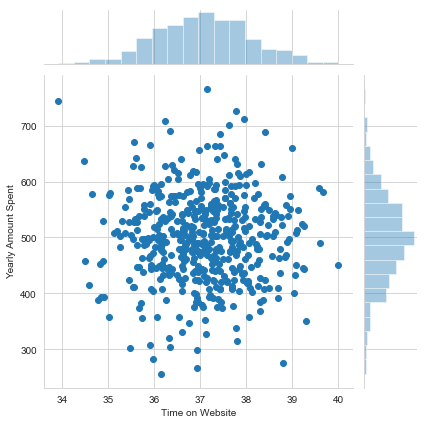

In [16]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data= df)

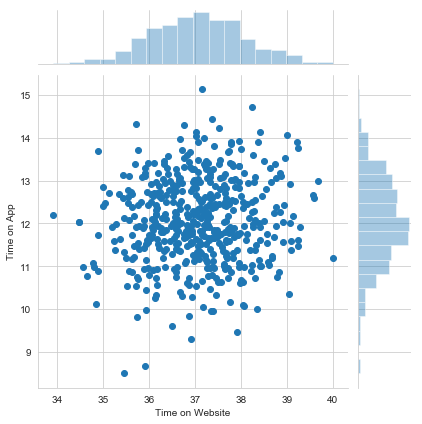

In [20]:
sns.jointplot(x='Time on Website', y='Time on App', data= df)

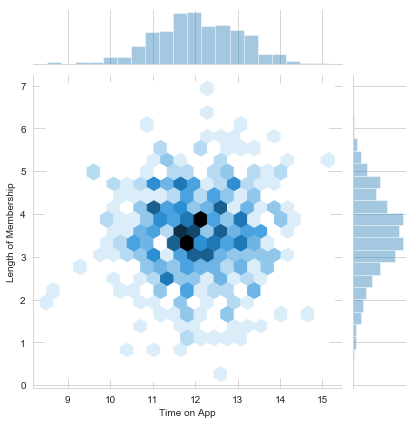

In [21]:
sns.jointplot(x= 'Time on App', y = 'Length of Membership', data = df, kind='hex')

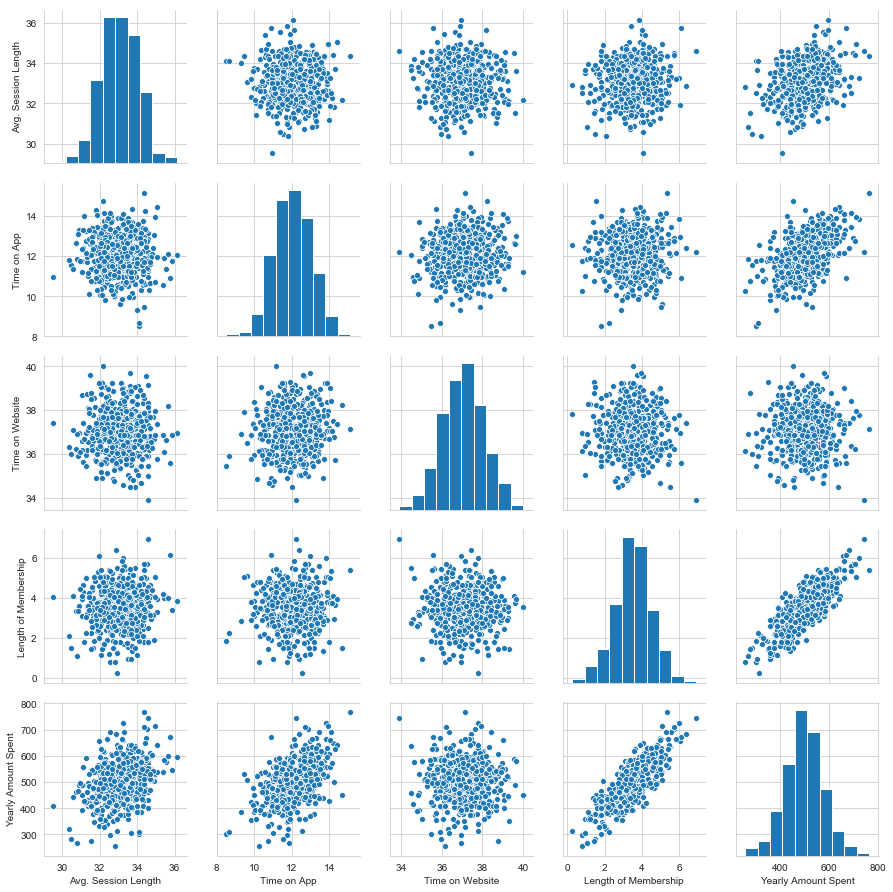

In [22]:
sns.pairplot(df)
# based of this plot we can see the length of Membership is more correlated with time on App

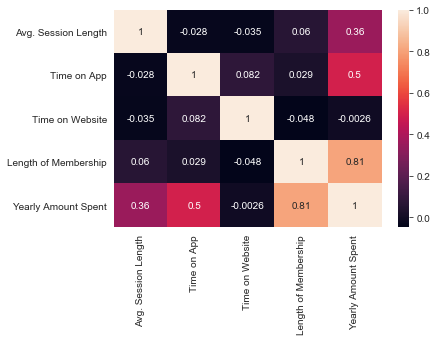

In [23]:
sns.heatmap(df.corr(),annot=True)

### 4. Splitting the data set

In [29]:
from sklearn.model_selection import train_test_split # importing package ti split the data

In [27]:
X= df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']] ## Columns You want in the model
y=df['Yearly Amount Spent'] # Column You want to predict

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 101)

# Lhs is basically tuple unpaking, it contains the train and test data for X and y
# RHS contain X, y as the aruguments and test_size determines the split ration and random_state is for random seed

### 5. Built the Model

In [35]:
from sklearn.linear_model import LinearRegression # importing the Linear Regression from linear_model Family
lm = LinearRegression() # Create the instance so we dnt have to call LinearRegression instead call lm
# And lm is the object that hold all the features of linear Regression

In [37]:
# Noe Fit the training data , Remeber we have X as input and y as output and makesure you take _train data
lm.fit(x_train, y_train) # it is taking x_train and y_train to fit the model and build the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
# print the coefficient
print(lm.coef_)

# Print intercept
print(lm.intercept_)

[25.69154034 37.89259966  0.56058149 61.64859402]
-1045.1152168245735


### 6. Prediction from the test set

In [57]:
predictions = lm.predict(x_test)

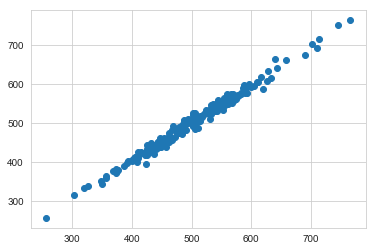

In [61]:
plt.scatter(x=y_test, y=predictions)

 R-Square

In [66]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = predictions)

0.9855061240024658

 Residuals

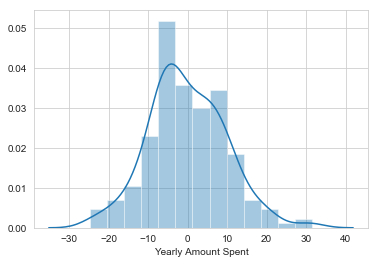

In [68]:
residuals = y_test-predictions
sns.distplot(residuals)

# 7. Regression Evaluation matrics

In [70]:
from sklearn import metrics

In [74]:
# Mean Absulote Error
print('MAE', metrics.mean_absolute_error(y_test, predictions))

# Mean Squared Error
print('MSE', metrics.mean_squared_error(y_test, predictions))


# Root mean Squared Error
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# R square
print('R-Sqr', metrics.r2_score(y_test, predictions))

MAE 7.7426712858387505
MSE 93.83297800820091
RMSE 9.686742383701597
R-Sqr 0.9855061240024658


In [75]:
import sklearn